In [1]:
#knn k-nearest neighbors是用k个最近邻的训练数据集来寻找未知对象分类的一种算法
#knn分类器存储了所有可用的数据点，并根据相似度指标来对新的数据点进行分类，这个相似度指标通常以
#距离函数的形式度量.
#一旦找出KNN，就会做一个多数表决，一个新数据点通过KNN的多数表决来进行分类，这个数据点会被分到
#KNN最常见的类中，如果K的值设置为1，那么这就变成了一个最近邻分类器，在该分类器中，将数据点分类到
#训练数据集中其最近邻所属的哪一类

     d1    d2  result
0  1.82  2.04     0.0
1  3.31  6.78     1.0
2  6.33  2.55     2.0
3  2.05  2.47     0.0
4  4.30  5.25     1.0


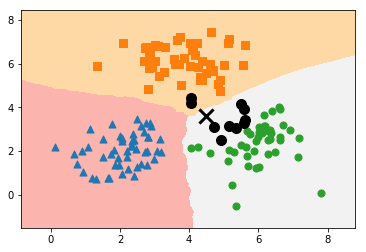

[2]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors,datasets
import pandas as pd

input_file=r'F:\程序员\python\Python机器学习经典实例\Chapter05\data_nn_classifier.txt'
f=open(input_file,'r')

data=pd.read_csv(f,dtype='float',header=None)
data.columns=['d1','d2','result']
print(data.head())

#设置最近邻的个数
num_neighbors=10
#定义网格，用网格的数据评价分类器
h=0.01
x_min,x_max=min(data['d1'])-1,max(data['d1'])+1
y_min,y_max=min(data['d2'])-1,max(data['d2'])+1
x_grid,y_grid=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

#创建KNN分类器模型
classifier=neighbors.KNeighborsClassifier(num_neighbors,weights='distance')
classifier.fit(data[['d1','d2']],data['result'].astype(int))

#预测网格的数据
predicted_values=classifier.predict(np.c_[x_grid.ravel(),y_grid.ravel()])
predicted_values=predicted_values.reshape(x_grid.shape)

#测试数据点
test_point=[4.5,3.6]
dist,indices=classifier.kneighbors([test_point])
indices=indices[0]
#可视化网格数据预测结果
plt.figure(1)
plt.pcolormesh(x_grid,y_grid,predicted_values,cmap=cm.Pastel1)

#输入数据可视化
for i in data['result'].astype(int).unique():
    
    plt.scatter(data['d1'].loc[data['result']==i],data['d2'].loc[data['result']==i],
               marker=markers[i],s=50)
plt.scatter(test_point[0],test_point[1],marker='x',linewidth=3,s=200,facecolors='k')
plt.scatter(data['d1'].iloc[indices],data['d2'].iloc[indices],marker='o',s=100,color='k')
plt.show()

predicted_poit=classifier.predict([test_point])
print(predicted_poit)